<a href="https://colab.research.google.com/github/Anshikasingla114/Deep-Learning-Assignmnet/blob/main/dl_assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**7.Write a program to compare the performance of SGD, Adam, and RMSprop optimizers on a given
dataset.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define optimizer functions
def sgd_update(params, grads, learning_rate):
    return params - learning_rate * grads

def adam_update(params, grads, t, m, v, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grads
    v = beta2 * v + (1 - beta2) * (grads ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    return params - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon), m, v

def rmsprop_update(params, grads, s, learning_rate, beta=0.9, epsilon=1e-8):
    s = beta * s + (1 - beta) * (grads ** 2)
    return params - learning_rate * grads / (np.sqrt(s) + epsilon), s

In [ ]:
# Logistic regression model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, params):
    return sigmoid(X.dot(params))

In [ ]:
# Binary cross-entropy loss function
def binary_crossentropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
# Training function
def train(X, y, optimizer_update, learning_rate=0.01, epochs=1000):
    params = np.random.randn(X.shape[1])
    if optimizer_update == adam_update:
        m, v = np.zeros_like(params), np.zeros_like(params)
        t = 0
    elif optimizer_update == rmsprop_update:
        s = np.zeros_like(params)

    loss_history = []
    for epoch in range(epochs):
        y_pred = predict(X, params)
        loss = binary_crossentropy_loss(y, y_pred)
        loss_history.append(loss)
        grads = -np.mean((y - y_pred).reshape(-1, 1) * X, axis=0)

        if optimizer_update == sgd_update:
            params = optimizer_update(params, grads, learning_rate)
        elif optimizer_update == adam_update:
            t += 1
            params, m, v = optimizer_update(params, grads, t, m, v, learning_rate)
        elif optimizer_update == rmsprop_update:
            params, s = optimizer_update(params, grads, s, learning_rate)

    return params, loss_history

In [ ]:
# Train models with different optimizers
learning_rate = 0.05
epochs = 1000

params_sgd, loss_sgd = train(X_train, y_train, sgd_update, learning_rate, epochs)
params_adam, loss_adam = train(X_train, y_train, adam_update, learning_rate, epochs)
params_rmsprop, loss_rmsprop = train(X_train, y_train, rmsprop_update, learning_rate, epochs)

<ipython-input-6-53ce84513fd2>:3: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
<ipython-input-6-53ce84513fd2>:3: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [ ]:
# Train models with different optimizers
learning_rate = 0.05
epochs = 1000

params_sgd, loss_sgd = train(X_train, y_train, sgd_update, learning_rate, epochs)
params_adam, loss_adam = train(X_train, y_train, adam_update, learning_rate, epochs)
params_rmsprop, loss_rmsprop = train(X_train, y_train, rmsprop_update, learning_rate, epochs)

<ipython-input-6-53ce84513fd2>:3: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
<ipython-input-6-53ce84513fd2>:3: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


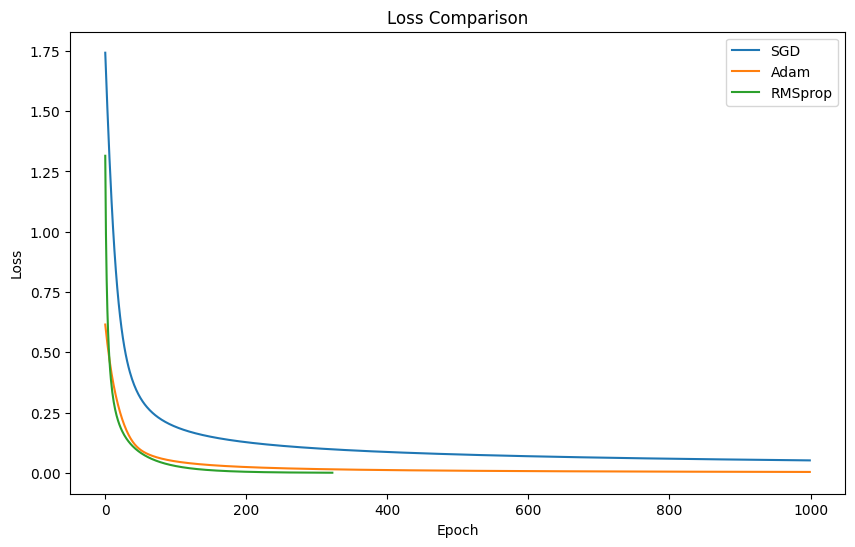

In [ ]:
# Plot the loss for each optimizer
plt.figure(figsize=(10, 6))
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_adam, label='Adam')
plt.plot(loss_rmsprop, label='RMSprop')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the models on the test set
def evaluate(X, y, params):
    y_pred = predict(X, params) >= 0.8
    accuracy = np.mean(y_pred == y)
    return accuracy

accuracy_sgd = evaluate(X_test, y_test, params_sgd)
accuracy_adam = evaluate(X_test, y_test, params_adam)
accuracy_rmsprop = evaluate(X_test, y_test, params_rmsprop)

print(f"SGD Test Accuracy: {accuracy_sgd:.4f}")
print(f"Adam Test Accuracy: {accuracy_adam:.4f}")
print(f"RMSprop Test Accuracy: {accuracy_rmsprop:.4f}")

SGD Test Accuracy: 1.0000
Adam Test Accuracy: 1.0000
RMSprop Test Accuracy: 1.0000


**8.Implement a neural network for binary classification and test different activation functions like ReLU, Sigmoid, and Tanh.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize parameters
input_size = X_train.shape[1]
hidden_size = 2
output_size = 1
learning_rate = 0.02
epochs = 3000

In [ ]:
# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

activation_functions = {
    "ReLU": (relu, relu_derivative),
    "Sigmoid": (sigmoid, sigmoid_derivative),
    "Tanh": (tanh, tanh_derivative)
}

In [ ]:
# Train and evaluate the neural network with different activation functions
for name, (activation, activation_derivative) in activation_functions.items():
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    weights_hidden_output = np.random.randn(hidden_size, output_size)

    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        hidden_input = X_train.dot(weights_input_hidden)
        hidden_output = activation(hidden_input)
        output_input = hidden_output.dot(weights_hidden_output)
        output_output = sigmoid(output_input)

        # Compute loss
        loss = -np.mean(y_train.reshape(-1, 1) * np.log(output_output) + (1 - y_train.reshape(-1, 1)) * np.log(1 - output_output))
        loss_history.append(loss)

        # Backward pass
        output_error = output_output - y_train.reshape(-1, 1)
        output_delta = output_error * sigmoid_derivative(output_input)

        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * activation_derivative(hidden_input)

        # Update weights
        weights_hidden_output -= learning_rate * hidden_output.T.dot(output_delta)
        weights_input_hidden -= learning_rate * X_train.T.dot(hidden_delta)


In [ ]:
# Evaluate on test set
hidden_input = X_test.dot(weights_input_hidden)
hidden_output = activation(hidden_input)
output_input = hidden_output.dot(weights_hidden_output)
output_output = sigmoid(output_input)
predictions = (output_output >= 0.5).astype(int).flatten()
accuracy = np.mean(predictions == y_test)

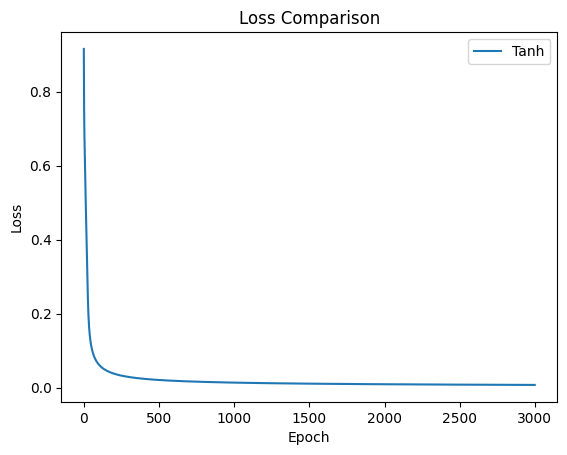

In [ ]:
# Plot the loss
plt.plot(loss_history, label=name)

plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**9.Implement a neural network to solve a multi-class classification problem and evaluate different
weight initialization techniques.**

Training with random initialization
Epoch 0, Loss: 1.0986
Epoch 100, Loss: 0.5426
Epoch 200, Loss: 0.2891
Epoch 300, Loss: 0.1825
Epoch 400, Loss: 0.1250
Epoch 500, Loss: 0.0969
Epoch 600, Loss: 0.0822
Epoch 700, Loss: 0.0734
Epoch 800, Loss: 0.0676
Epoch 900, Loss: 0.0635
Accuracy with random initialization: 100.00%

Training with xavier initialization
Epoch 0, Loss: 1.3440
Epoch 100, Loss: 0.2175
Epoch 200, Loss: 0.1380
Epoch 300, Loss: 0.1025
Epoch 400, Loss: 0.0844
Epoch 500, Loss: 0.0740
Epoch 600, Loss: 0.0675
Epoch 700, Loss: 0.0632
Epoch 800, Loss: 0.0600
Epoch 900, Loss: 0.0576
Accuracy with xavier initialization: 100.00%

Training with he initialization
Epoch 0, Loss: 3.5520
Epoch 100, Loss: 0.2709
Epoch 200, Loss: 0.1763
Epoch 300, Loss: 0.1253
Epoch 400, Loss: 0.0973
Epoch 500, Loss: 0.0809
Epoch 600, Loss: 0.0705
Epoch 700, Loss: 0.0635
Epoch 800, Loss: 0.0582
Epoch 900, Loss: 0.0542
Accuracy with he initialization: 100.00%



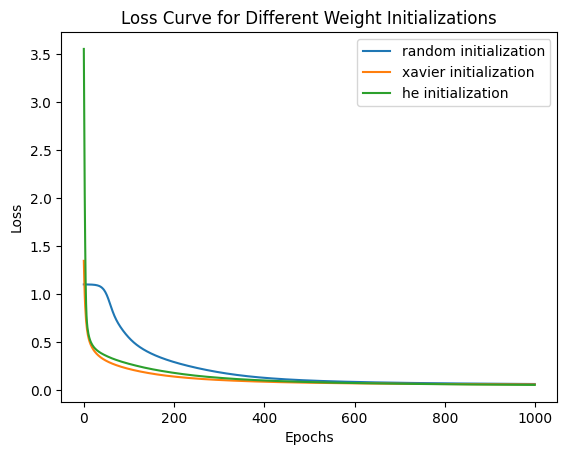

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Convert class labels to numerical values
class_mapping = {label: idx for idx, label in enumerate(df["class"].unique())}
df["class"] = df["class"].map(class_mapping)

# Split dataset into features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# One-hot encode target labels
num_classes = len(np.unique(y))
Y = np.eye(num_classes)[y]

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train-test split
def train_test_split(X, Y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Weight Initialization Methods
def initialize_weights(input_dim, hidden_dim, output_dim, method="random"):
    if method == "random":
        W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    elif method == "xavier":
        W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(1.0 / input_dim)
        W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(1.0 / hidden_dim)
    elif method == "he":
        W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2.0 / input_dim)
        W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2.0 / hidden_dim)
    else:
        raise ValueError("Invalid weight initialization method.")

    b1 = np.zeros((1, hidden_dim))
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# Activation Functions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Loss Function (Cross-Entropy)
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

# Forward Propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Backpropagation
def backward_propagation(X, Y, Z1, A1, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update Weights
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training the Neural Network
def train(X, Y, input_dim, hidden_dim, output_dim, epochs=1000, learning_rate=0.01, init_method="random"):
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim, method=init_method)
    losses = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = cross_entropy_loss(Y, A2)
        losses.append(loss)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W1, b1, W2, b2, losses

# Predict Function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

# Train with different initializations
for init in ["random", "xavier", "he"]:
    print(f"Training with {init} initialization")
    W1, b1, W2, b2, losses = train(X_train, Y_train, input_dim=4, hidden_dim=10, output_dim=3, epochs=1000, learning_rate=0.1, init_method=init)
    predictions = predict(X_test, W1, b1, W2, b2)
    accuracy = np.mean(predictions == np.argmax(Y_test, axis=1)) * 100
    print(f"Accuracy with {init} initialization: {accuracy:.2f}%\n")

    # Plot loss curve
    plt.plot(losses, label=f'{init} initialization')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for Different Weight Initializations")
plt.legend()
plt.show()


**10.Write a program to generate confusion matrices for different models and analyze their performance.**

In [ ]:
#import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

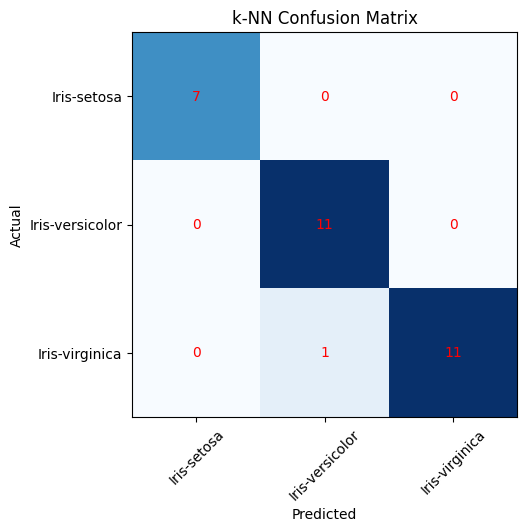

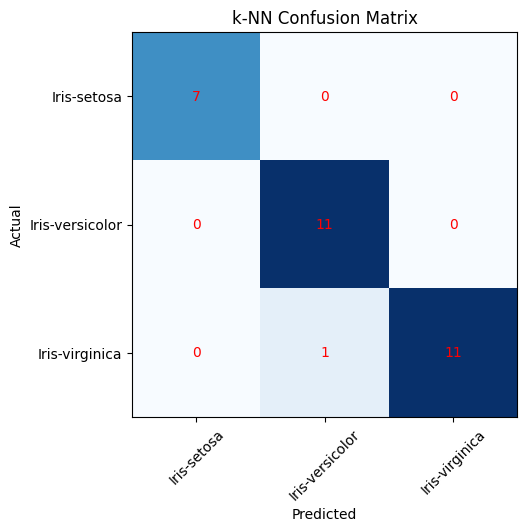

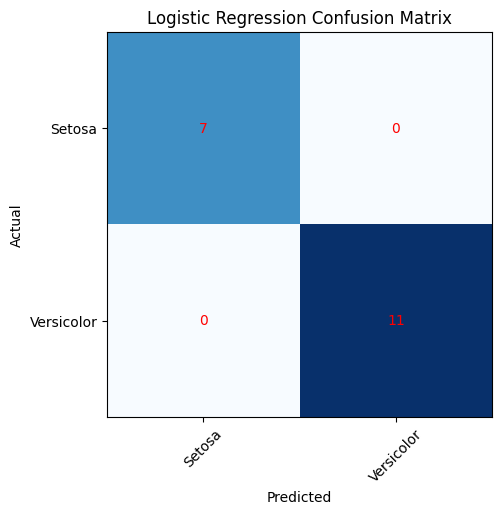

In [ ]:
# Load the Iris dataset
def load_iris():
    df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                     header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
    class_mapping = {label: idx for idx, label in enumerate(df["class"].unique())}
    df["class"] = df["class"].map(class_mapping)
    return df, class_mapping

def train_test_split(df, test_size=0.2):
    shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_idx = int(len(df) * (1 - test_size))
    return shuffled.iloc[:split_idx], shuffled.iloc[split_idx:]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(train_data, train_labels, test_data, k=3):
    predictions = []
    for test_point in test_data:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = [train_labels[idx] for idx in nearest_indices]
        most_common = Counter(nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return np.array(predictions)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    weights = np.zeros(X.shape[1])
    for _ in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / y.size
        weights -= lr * gradient
    return weights

def logistic_predict(X, weights):
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)

def confusion_matrix(y_true, y_pred, class_names):
    n_classes = len(class_names)
    matrix = np.zeros((n_classes, n_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1
    return matrix

def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.yticks(range(len(class_names)), class_names)
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
# Load data and split
df, class_mapping = load_iris()
train, test = train_test_split(df)
X_train, y_train = train.iloc[:, :-1].values, train.iloc[:, -1].values
X_test, y_test = test.iloc[:, :-1].values, test.iloc[:, -1].values
# k-NN Predictions (k=3)
y_pred_knn = knn_predict(X_train, y_train, X_test, k=3)
cm_knn = confusion_matrix(y_test, y_pred_knn, class_mapping)
plot_confusion_matrix(cm_knn, list(class_mapping.keys()), "k-NN Confusion Matrix")
# k-NN Predictions (k=3)
y_pred_knn = knn_predict(X_train, y_train, X_test, k=3)
cm_knn = confusion_matrix(y_test, y_pred_knn, class_mapping)
plot_confusion_matrix(cm_knn, list(class_mapping.keys()), "k-NN Confusion Matrix")
# Logistic Regression Predictions (binary classification)
binary_train = train[train['class'] < 2]  # Only class 0 and 1
binary_test = test[test['class'] < 2]
X_train_bin, y_train_bin = binary_train.iloc[:, :-1].values, binary_train.iloc[:, -1].values
X_test_bin, y_test_bin = binary_test.iloc[:, :-1].values, binary_test.iloc[:, -1].values
weights = logistic_regression(X_train_bin, y_train_bin)
y_pred_logistic = logistic_predict(X_test_bin, weights)
cm_logistic = confusion_matrix(y_test_bin, y_pred_logistic, [0, 1])
plot_confusion_matrix(cm_logistic, ["Setosa", "Versicolor"], "Logistic Regression Confusion Matrix")

